James Irwin \
CSC 369 Analysis Code \
03.08.2025

[Dataset](https://console.cloud.google.com/marketplace/product/city-of-chicago-public-data/chicago-taxi-trips)

In [1]:
import matplotlib.pyplot as plt

**1. First Ten Rows**

In [99]:
%%bigquery first_ten
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

In [100]:
first_ten

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,7dd16f9de6f56eec5726d36087da4775c54a90a1,91fc0e26b37fd95a2d5af3b014b49d5a1ace82bf9303f9...,2014-03-13 08:00:00+00:00,2014-03-13 08:00:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,1.00,No Charge,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
1,12362975d83eee28aee149b91773ea00248404b2,cd146f10b409be6c492bb98f14d3d8cea84dcf6005015b...,2014-03-16 17:00:00+00:00,2014-03-16 17:15:00+00:00,660,0.0,<NA>,<NA>,<NA>,<NA>,...,3.0,11.65,Cash,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None
2,2b46a00bd3d8b7aca998e2268b6af141e9f9b344,c49f0ddc62fe52ff6d19832b7168a6818f17d8ccb7f59a...,2014-12-22 18:45:00+00:00,2014-12-22 18:45:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,3.25,Cash,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None
3,b31c71792c747f2a71eee8b43bb840e47b4173d6,dafccbebfd9982f579bc8f0812c318438f1af9f9f40e90...,2014-03-29 18:45:00+00:00,2014-03-29 18:45:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,13.65,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
4,87c22eb7f4ea7399225968c65a862ab8b440139d,00f011f177d14242f8a1eb4315abe2f7b82be989761ed1...,2014-04-22 09:30:00+00:00,2014-04-22 09:30:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,8.85,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
5,6c258206f1decf82dab60e28f5ee2e65cec764b9,ba700f3508a7569ac18968a7fe9d87f5c930eb0d4be9b2...,2014-12-22 14:00:00+00:00,2014-12-22 14:00:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,7.00,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,None,NaN,NaN,None
6,bd381dd0e94f37f810915d040ca22ea2c330ce86,1344830e881c7eba092d0c19fc0d33fb004fce69324141...,2014-03-18 11:00:00+00:00,2014-03-18 11:00:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,5.95,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
7,868483165e3fddeb10424098227ef9e210c9c4ef,aabecb47e958f99860a3b4d01f14d53644ac26126d9519...,2014-04-02 22:30:00+00:00,2014-04-02 22:30:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,13.05,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None
8,115523a23649889f16ea77986ee1fff60a792ff1,e61ce97d61bec30e506e2ff56ea034ad7c06cc6a0a4c0f...,2014-03-29 17:00:00+00:00,2014-03-29 17:15:00+00:00,720,3.0,<NA>,<NA>,<NA>,<NA>,...,1.0,11.05,Cash,Chicago Medallion Management,NaN,NaN,None,NaN,NaN,None
9,6fb19b96861ce4a086331fc67fbee675f186f8aa,33eb8518952dbdc8a4c6648ad8fdf65dc84fac160f3d6f...,2014-04-16 19:00:00+00:00,2014-04-16 19:00:00+00:00,0,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,10.00,Credit Card,T.A.S. - Payment Only,NaN,NaN,None,NaN,NaN,None


**2. Trips per Year**

In [105]:
%%bigquery trips_yearly
WITH before_covid AS (
  SELECT *
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE trip_start_timestamp < TIMESTAMP("2020-01-01")
),
all_trips AS (
  SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  taxi_id, COUNT(*) as num_trips
  FROM before_covid
  GROUP BY year, taxi_id
  ORDER BY year, taxi_id
)
SELECT year,
SUM(num_trips) AS total_trips,
ROUND(AVG(num_trips), 2) AS avg_trips
FROM all_trips
GROUP BY year
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

In [106]:
trips_yearly

,year,total_trips,avg_trips
0,2013,27217300,4601.40
1,2014,37395079,4806.57
2,2015,32385527,4150.39
3,2016,31756403,3981.49
4,2017,24979611,3497.57
5,2018,20731105,3295.36
6,2019,16476440,2943.27


<Axes: title={'center': 'Total Taxi Trips Per Year'}, xlabel='Year', ylabel='Number of Trips'>

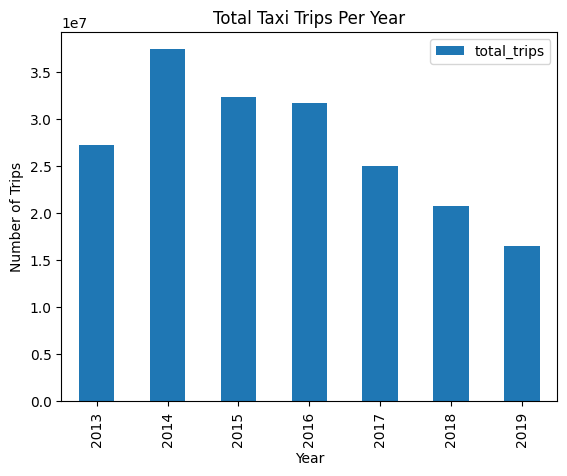

In [115]:
trips_yearly.plot.bar(x="year", y="total_trips", xlabel="Year", ylabel="Number of Trips", title="Total Taxi Trips Per Year")

<Axes: title={'center': 'Average Number of Trips Per Taxi'}, xlabel='Year', ylabel='Average Trips'>

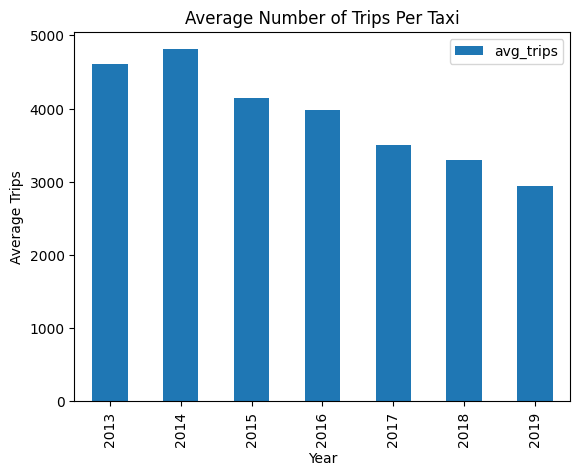

In [120]:
trips_yearly.plot.bar(x="year", y="avg_trips", xlabel="Year", ylabel="Average Trips", title="Average Number of Trips Per Taxi")

**3. Prevalence of Data Issues**

In [109]:
%%bigquery invalid_yearly
WITH before_covid AS (
  SELECT *
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE trip_start_timestamp < TIMESTAMP("2020-01-01")
),
by_year AS (
  SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  COUNT(*) AS invalid_trips,
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE (trip_seconds = 0 OR trip_seconds IS NULL)
  OR (trip_miles = 0 OR trip_miles IS NULL)
  GROUP BY EXTRACT(YEAR FROM trip_start_timestamp)
  ORDER BY year
)
SELECT *, invalid_trips / SUM(invalid_trips) OVER () AS proportion
FROM by_year
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

In [110]:
invalid_yearly

,year,invalid_trips,proportion
0,2013,12140411,0.272240
1,2014,8977606,0.201316
2,2015,7178665,0.160976
3,2016,5508148,0.123516
4,2017,3044188,0.068264
5,2018,2582237,0.057905
6,2019,2448492,0.054906
7,2020,627853,0.014079
8,2021,596502,0.013376
9,2022,803150,0.018010


<Axes: title={'center': 'Proportion of Obersvations with Missing Values'}, xlabel='Year', ylabel='Proportion'>

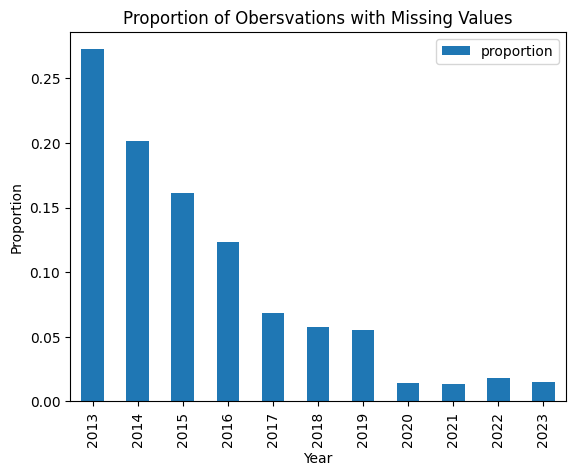

In [122]:
invalid_yearly.plot.bar(x="year", y="proportion", xlabel="Year", ylabel="Proportion", title="Proportion of Obersvations with Missing Values")

**4. Using Timestamp Difference Instead**

In [112]:
%%bigquery difference_yearly
WITH before_covid AS (
  SELECT *
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE trip_start_timestamp < TIMESTAMP("2020-01-01")
),
time_diffs AS (
  SELECT *,
  TIMESTAMP_DIFF(trip_end_timestamp, trip_start_timestamp, SECOND) AS diff_seconds
  FROM before_covid
),
by_year AS (
  SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
  COUNT(*) AS invalid_trips,
  FROM time_diffs
  WHERE (diff_seconds <= 0 OR diff_seconds IS NULL)
  GROUP BY EXTRACT(YEAR FROM trip_start_timestamp)
  ORDER BY year
)
SELECT *, invalid_trips / SUM(invalid_trips) OVER () AS proportion
FROM by_year
ORDER BY year


Query is running:   0%|          |

Downloading:   0%|          |

In [113]:
difference_yearly

,year,invalid_trips,proportion
0,2013,11473762,0.154336
1,2014,15119073,0.203370
2,2015,12960006,0.174328
3,2016,12266673,0.165002
4,2017,9281231,0.124844
5,2018,7516903,0.101111
6,2019,5725081,0.077009


<Axes: title={'center': 'Proportion of Timestamp Differences with Missing Values'}, xlabel='Year', ylabel='Proportion'>

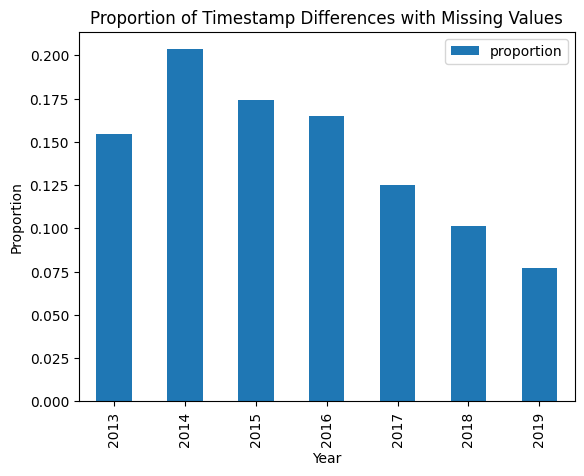

In [123]:
difference_yearly.plot.bar(x="year", y="proportion", xlabel="Year", ylabel="Proportion", title="Proportion of Timestamp Differences with Missing Values")

**5. Yearly Average Time Difference**

In [125]:
%%bigquery time_diff_yearly
WITH before_covid AS (
  SELECT *
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE trip_start_timestamp < TIMESTAMP("2020-01-01")
),
time_diffs AS (
  SELECT *,
  TIMESTAMP_DIFF(trip_end_timestamp, trip_start_timestamp, SECOND) AS diff_seconds
  FROM before_covid
)
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
ROUND(AVG(diff_seconds), 2) AS avg_seconds
FROM time_diffs
WHERE (diff_seconds > 0 AND diff_seconds IS NOT NULL)
GROUP BY year
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: title={'center': 'Average Number of Seconds Per Ride'}, xlabel='Year', ylabel='Average Seconds'>

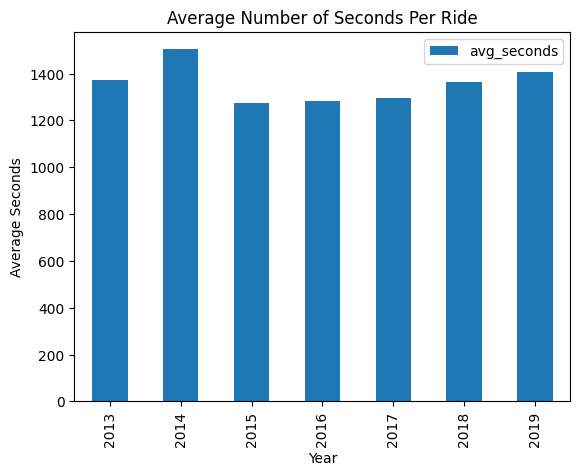

In [126]:
time_diff_yearly.plot.bar(x="year", y="avg_seconds", xlabel="Year", ylabel="Average Seconds", title="Average Number of Seconds Per Ride")

**6. We have issues with Miles, but we'll take a look anyways**

In [132]:
%%bigquery miles_yearly
WITH before_covid AS (
  SELECT *
  FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
  WHERE trip_start_timestamp < TIMESTAMP("2020-01-01")
)
SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year,
ROUND(AVG(trip_miles), 2) AS avg_miles
FROM before_covid
WHERE (trip_miles > 0 AND trip_miles IS NOT NULL)
GROUP BY year
ORDER BY year

Query is running:   0%|          |

Downloading:   0%|          |

In [133]:
miles_yearly

,year,avg_miles
0,2013,3.91
1,2014,3.69
2,2015,4.08
3,2016,4.71
4,2017,4.10
5,2018,4.19
6,2019,4.33


<Axes: title={'center': 'Average Number of Miles Traveled Per Year'}, xlabel='Year', ylabel='Average Miles'>

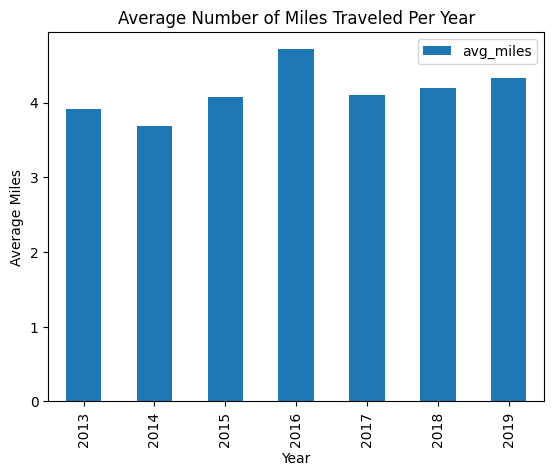

In [135]:
miles_yearly.plot.bar(x="year", y="avg_miles", xlabel="Year", ylabel="Average Miles", title="Average Number of Miles Traveled Per Year")